In [1]:
!pip3 install pandas numpy sklearn --user

import warnings
warnings.filterwarnings('ignore')

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


#  1. Ensembles

The three most popular methods for combining the predictions from different models are:
- **Bagging**: Building multiple models (typically of the same type) from different subsamples 
of the training dataset.
- **Boosting**: Building multiple models (typically of the same type) each of which learns to fix 
the prediction errors of a prior model in the sequence of models.
- **Voting**: Building multiple models (typically of differing types) and simple statistics (like 
calculating the mean) are used to combine predictions.

This assumes you are generally familiar with machine learning algorithms and ensemble methods 
and will not go into the details of how the algorithms work or their parameters. 

The Pima Indians onset of Diabetes dataset is used to demonstrate each algorithm. Each ensemble algorithm is demonstrated using 10-fold cross-validation and the classification accuracy performance metric.

### Bagging Algorithms

Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset (with replacement) and training a model for each sample. The final output prediction is averaged across the predictions of all of the sub-models. The diagram below describes the process:

<img src="./img/bagging.PNG" width="800px"></img>

The two bagging models covered in this section are as follows:

- Bagged Decision Trees. 
- Random Forest.

More information on Bagging, can be found in the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html">API Documentation</a> Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning. 

In the example below we demonstrate the use of the ```BaggingClassifier``` with the Classification and Regression Trees algorithm (```DecisionTreeClassifier```), with a total of 100 trees created. You can read about the Decision Tree class in the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">API Documentation</a>

In [2]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 

dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

seed = 7
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed) 

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7578263841421736


Given the above code block, we can very easily modify it to build a Random Forest Classifier with 100 trees and 3 max features, as follows:

In [3]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

seed = 7
num_trees = 100
max_features = 3

kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features) 

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7617737525632263


You can read more about using the ```RandomForestClassifier``` in the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">API Documentation</a>

### Boosting Algorithms

AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay less attention to them in the construction of subsequent models. Here is an illustration detailing the process:
<img src="./img/boosting.PNG" width="800px"></img>

You can construct an AdaBoost model for classification using the ```AdaBoostClassifier``` class. The example below 
demonstrates the construction of 30 decision trees in sequence using the AdaBoost algorithm. See the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html">API Documentation</a> to learn more.

In [4]:
# AdaBoost Classification

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

seed=7
num_trees = 30

kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7552802460697198


### Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data. The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from sub-models, but this is called stacking (stacked aggregation) and is currently not provided in scikit-learn.

You can create a voting ensemble model for classification using the ```VotingClassifier``` class. The code below provides an example of combining the predictions of logistic regression, classification and regression trees and support vector machines together for a classification problem. See the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html">API Documentation</a>. 

In [5]:
# Voting Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

# create the sub models
estimators = []
model1 = LogisticRegression()

estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)

results = cross_val_score(ensemble, X, Y, cv=kfold)

print(results.mean())

0.773462064251538


# 2. Shortlisting Algorithms

You cannot know which algorithm will work best on your dataset beforehand. You must use trial and error to discover a shortlist of algorithms that do well on your problem that you can then double down on and tune further. I call this process spot-checking. 

The question is not: What algorithm should I use on my dataset? Instead it is: What algorithms should I spot-check on my dataset? You can guess at what algorithms might do well on your dataset, and this can be a good starting point. I recommend trying a mixture of algorithms and see what is good at picking out the structure in your data. Below are some suggestions when spot-checking algorithms on your dataset: 

- Try a mixture of algorithm representations (e.g. instances and trees).
- Try a mixture of learning algorithms (e.g. different algorithms for learning the same type of representation).
- Try a mixture of modelling types (e.g. linear and nonlinear functions or parametric and non-parametric).

We are going to take a look at four classification algorithms that you can spot-check on your 
dataset. 

- Logistic Regression
- k-Nearest Neighbors.
- Classification and Regression Trees (CART). 
- Support Vector Machines.

## Logistic Regression. 

Logistic regression assumes a Gaussian distribution for the numeric input variables and can model binary classification problems. You can construct a logistic regression model using the ```LogisticRegression``` class. See the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">API Documentation</a> for more information. 

In [6]:
# Logistic Regression Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

seed = 7
num_folds = 10

kfold = KFold(n_splits=10, random_state=seed,shuffle=True)

model = LogisticRegression(solver='liblinear')

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7708646616541353


## k-Nearest Neighbors (KNN). 

KNN uses a distance metric to find the k most similar instances in 
the training data for a new instance and takes the mean outcome of the neighbors as the prediction. 
You can construct a KNN model using the ```KNeighborsClassifier``` class. See the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">API documentation</a> for more details. 

In [7]:
# KNN Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

seed = 7
num_folds = 10
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

model = KNeighborsClassifier()

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7109876965140123


## Support Vector Machines (SVM)

SVM seek a line that best separates two classes. Those data instances that are closest to the line that best separates the classes are called support vectors and influence where the line is placed. SVM has been extended to support multiple classes. Of 
particular importance is the use of different kernel functions via the kernel parameter. A powerful Radial Basis Function is used by default. 

You can construct an SVM model using the ```SVC``` class. See the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">API Documentation</a> for more information. Here is a simple example:

In [8]:
# SVM Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

seed = 7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)

model = SVC()

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.760457963089542


## Classification and Regression Trees (CART or just decision trees) 

CART constructs a binary tree from the training data. Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimise a cost function (like the Gini index). 

Let's look at an example of a Decision tree trained on a hypothetical heart attack data set.  

Here we can see the various attributes distributed through the tree structure:
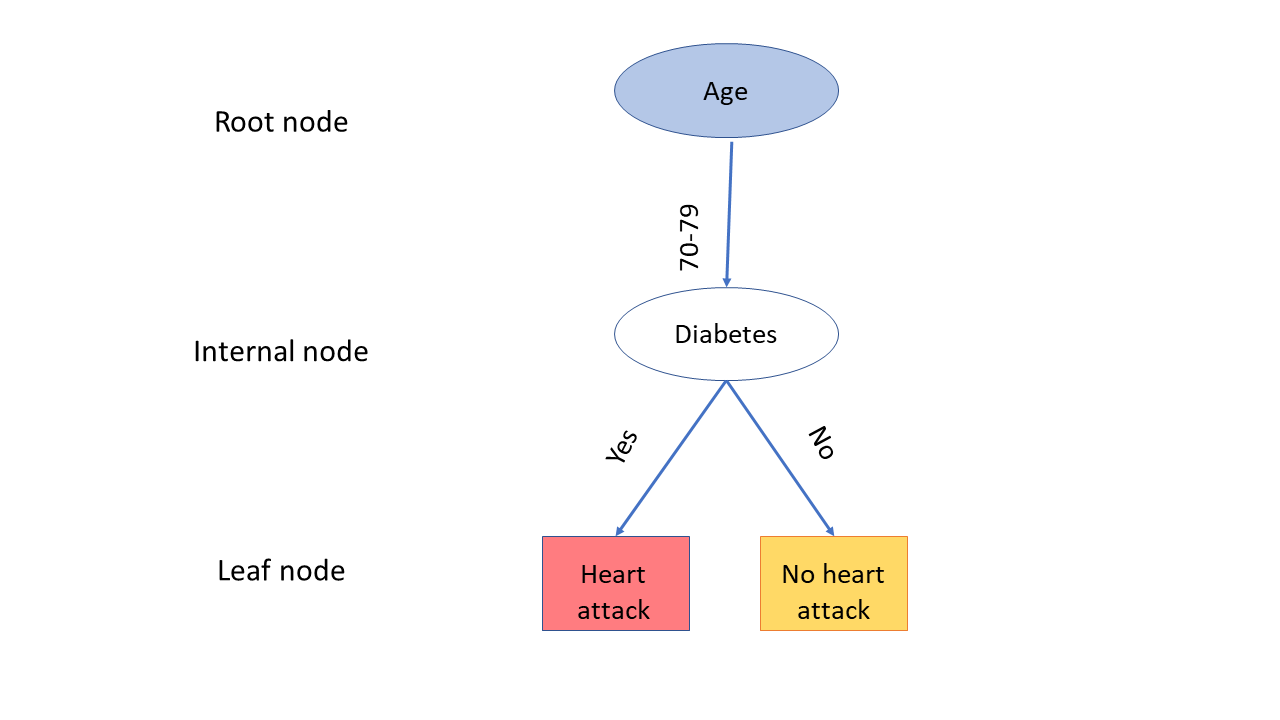

The decision tree, once constructed, can make predictions on new data by taking a path through the tree and visiting the internal nodes until it reaches a leaf node where the target variable is stored:
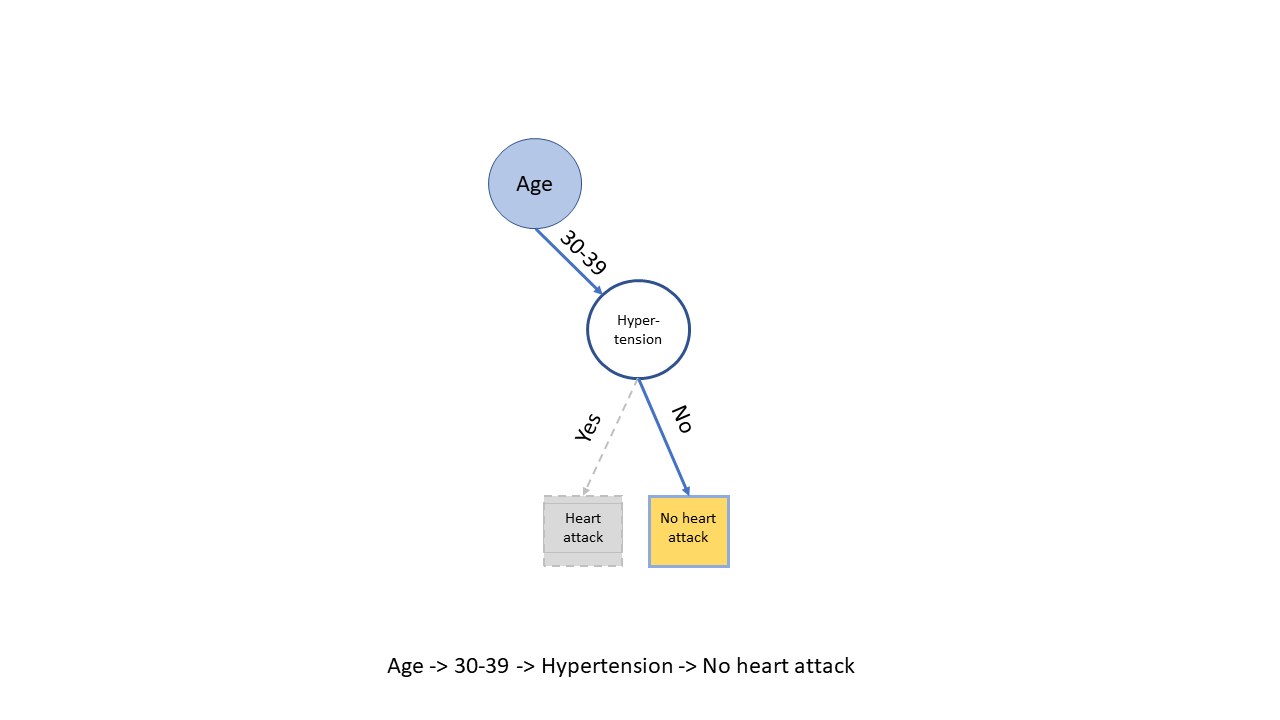

Here is an example of a fully constructed decision tree on this data:  
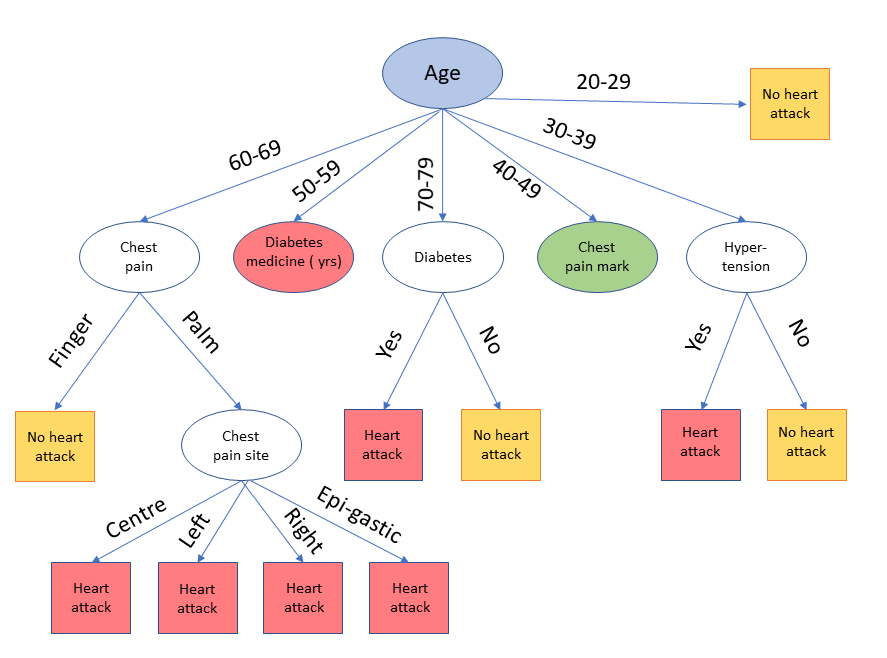

You can construct a CART model using the ```DecisionTreeClassifier``` class. See the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">API Documentation</a> for more details. Here is a simple example using our diabetes data set:

In [9]:
# CART Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

seed = 7
test_size = 0.1

# split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit a model
model = DecisionTreeClassifier(criterion = "gini", random_state=seed)
model.fit(X_train, Y_train)

predicted = model.predict(X_test)

report = classification_report(Y_test, predicted)

print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79        46
         1.0       0.69      0.65      0.67        31

    accuracy                           0.74        77
   macro avg       0.73      0.72      0.73        77
weighted avg       0.74      0.74      0.74        77



### Decision trees and overfitting
Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. 

Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem. 

Pruning decision trees, is very easy to implement, we just need to tweak some of the parameters of the model, such as the ```max_leaf_nodes```, ```min_smaples```, and ```max_depth``` to achieve this, as the below code block demonstrates, we will rebuild a new tree by using the above data and see how it works by tweeking some of the parameters:

In [10]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

test_size = 0.1
seed = 7

# split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit a model
model = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5, random_state=seed)
model.fit(X_train, Y_train)

predicted = model.predict(X_test)

report = classification_report(Y_test, predicted)

print(report)

              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82        46
         1.0       0.83      0.48      0.61        31

    accuracy                           0.75        77
   macro avg       0.78      0.71      0.72        77
weighted avg       0.77      0.75      0.74        77



# 3. Comparing ML Algorithms

When you work on a machine learning project, you often end up with multiple good models to choose from. Each model will have different performance characteristics. Using resampling methods like cross-validation, you can get an estimate for how accurate each model may be on unseen data. You need to be able to use these estimates to choose one or two best models from the suite of models that you have created.

When you have a new dataset, it is a good idea to visualise the data using different techniques in order to look at the data from different perspectives. The same idea applies to model selection. You should use a number of different ways of looking at the estimated accuracy of your machine learning algorithms in order to choose the one or two algorithm to finalise. A way to do this is to use visualisation methods to show the average accuracy, variance and other properties of the distribution of model accuracies. In this section you will discover exactly how you can do that in Python with scikit-learn.

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness. In the example below six different classification algorithms are compared on a single dataset:

- Logistic Regression.
- Linear Discriminant Analysis.
- k-Nearest Neighbors.
- Classification and Regression Trees. 
- Naive Bayes.
- Support Vector Machines.

The dataset is, as usual, the Pima Indians onset of diabetes problem. The problem has two classes and eight 
numeric input variables of varying scales. 

The 10-fold cross-validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithm is evaluated in precisely the same way. 

Each algorithm is given a short name, useful for summarising results afterward.

In [11]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# load dataset
filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
seed = 7 

for name, model in models:
   kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
   cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.770865 (0.050905)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.682416 (0.046158)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


# 4. Pipelining

There are standard workflows in applied machine learning. Standard because they overcome 
common problems like data leakage in your test harness. Python scikit-learn provides a ```Pipeline``` 
utility to help automate machine learning workflows. Pipelines work by allowing for a linear 
sequence of data transforms to be chained together culminating in a modelling process that can be 
evaluated.

The goal is to ensure that all of the steps in the pipeline are constrained to the data available for the 
evaluation, such as the training dataset or each fold of the cross-validation procedure. You can learn 
more about pipelines in scikit-learn by reading the Pipeline section of the <a href="https://scikit-learn.org/stable/modules/compose.html">API guide</a>. 

You can also review the <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline">API documentation</a> for the ```Pipeline``` and ```FeatureUnion``` classes and the 
pipeline module. 

## The problem
An easy trap to fall into in applied machine learning is leaking data from your training dataset to 
your test dataset. To avoid this trap you need a robust test harness with strong separation of training 
and testing. This includes data preparation. Data preparation is one easy way to leak knowledge of 
the whole training dataset to the algorithm. For example, preparing your data using normalisation or 
standardisation on the entire training dataset before learning would not be a valid test because the 
training dataset would have been influenced by the scale of the data in the test set.



Pipelines help you prevent data leakage in your test harness by ensuring that data preparation like 
standardisation is constrained to each fold of your cross-validation procedure. The example below 
demonstrates this important data preparation and model evaluation workflow on the Pima Indians 
onset of diabetes dataset. The pipeline is defined with two steps:

1. Standardise the data.
2. Learn a Linear Discriminant Analysis model.

The pipeline is then evaluated using 10-fold cross-validation.

In [12]:
# Create a pipeline that standardises the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# load data
filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

seed = 7

# create pipeline
estimators = []
estimators.append(('standardise', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7669685577580315


Feature extraction is another procedure that is susceptible to data leakage. Like data preparation, 
feature extraction procedures must be restricted to the data in your training dataset. The pipeline 
provides a handy tool called the ```FeatureUnion``` which allows the results of multiple feature 
selection and extraction procedures to be combined into a larger dataset on which a model can be 
trained. Importantly, all the feature extraction and the feature union occurs within each fold of the 
cross-validation procedure. The example below demonstrates the pipeline defined with four steps:

    1. Feature Extraction with Principal Component Analysis (3 features). 
    2. Feature Extraction with Statistical Selection (6 features).
    3. Feature Union.
    4. Learn a Logistic Regression Model.
    
The pipeline is then evaluated using 10-fold cross-validation. Analyse the code block to see how the ```FeatureUnion``` is its own Pipeline that in turn is a single step in the final Pipeline used to feed Logistic Regression. This might get you thinking about how you can start embedding pipelines within pipelines. 

In [13]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# load data
filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

seed = 7

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union)) 
estimators.append(('logistic', LogisticRegression()))

model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7708646616541353


# 5. Tuning the model

Algorithm tuning is a final step in the process of applied machine learning before finalising your model. It is sometimes called hyperparameter optimisation where the algorithm parameters are referred to as hyperparameters, whereas the coefficients found by the machine learning algorithm itself are referred to as parameters. 

Optimisation suggests the search-nature of the problem. Phrased as a search problem, you can use different search strategies to find a good and robust parameter or set of parameters for an algorithm on a given problem. Python scikit-learn provides two simple methods for algorithm parameter tuning:

    1. Grid Search Parameter Tuning.
    2. Random Search Parameter Tuning.
    
### Grid search
Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. You can perform a grid search using the ```GridSearchCV``` class. See the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">API Documentation</a> to learn more about how to apply it. 

The example below evaluates different alpha values for the *Ridge Regression* algorithm on the standard diabetes dataset. This is a one-dimensional grid search: 

In [14]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# The varying parameters to test and choose the best from
alphas = numpy.array([1, 0.1, 0.01, 0.001, 0.0001, 0])

param_grid = dict(alpha=alphas)
model = Ridge()

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

print("Best score", grid.best_score_)
print("Recommended alpha value", grid.best_estimator_.alpha)

Best score 0.27610844129292433
Recommended alpha value 1.0


### Random search
Random search is an approach to parameter tuning that will sample algorithm parameters from a random distribution (i.e. uniform) for a fixed number of iterations. A model is constructed and evaluated for each combination of parameters chosen. You can perform a random search for algorithm parameters using the ```RandomizedSearchCV``` class. See the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
">API Documentation</a> for more information.

The example below evaluates different random alpha values between 0 and 1 for the Ridge Regression algorithm on the standard diabetes dataset. 

A total of 100 iterations are performed with uniformly random alpha values selected in the range between 0 and 1 (the range that alpha values can take).

In [15]:
# Randomised for Algorithm Tuning
from pandas import read_csv
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV 

filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# Need to set the random seed for reproducability
seed = 7
param_grid = {'alpha': uniform()}

model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=seed)
rsearch.fit(X, Y)

print("Best score", rsearch.best_score_)
print("Recommended alpha value", rsearch.best_estimator_.alpha)

Best score 0.27610755734028525
Recommended alpha value 0.9779895119966027


Both tuning approaches returned differing recommended alpha values, but both are very close and have narrowed down the search leaving you to experiment and judge from the measures of accuracy you get from the model you choose.

# 6. Saving and Loading the Model
Pickle is the standard way of serialising objects in Python. You can use the ```pickle``` operation to serialise your machine learning algorithms and save the serialised format to a file. See the <a href="https://docs.python.org/2/library/pickle.html">API Documentation</a> to learn more. 

Later you can load this file to deserialise your model and use it to make new predictions. The example below demonstrates how you can train a logistic regression model on the Pima Indians onset of diabetes dataset, save the model to file and load it to make predictions on the unseen test 
set.

In [16]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

filename = './data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
dataframe = read_csv(filename, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# Fit the model on 33%
model = LogisticRegression() 
model.fit(X_train, Y_train)

# save the model to disk
filename = './data/finalised_model.sav' 

print("Saving", filename)
dump(model, open(filename, 'wb'))


# some time later...


# load the model from disk
print("Loading", filename)
loaded_model = load(open(filename, 'rb')) 
result = loaded_model.score(X_test, Y_test) 
print(result)

Saving ./data/finalized_model.sav
Loading ./data/finalized_model.sav
0.7874015748031497


That's all we have time for now, in the next hands-on demo we will start to explore neural networks and we implement some of the basic components.